In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import gradio as gr

from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.preprocessing import StandardScaler

In [2]:
df = pd.read_csv('/content/stock_data.csv')

In [23]:
df.head()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
Unnamed: 0,,,,,
2020-01-01,101.764052,100.160928,99.494642,99.909756,101.761266
2020-01-02,102.171269,99.969968,98.682973,100.640755,102.528643
2020-01-03,103.171258,99.575237,98.182139,100.574847,101.887811
2020-01-04,105.483215,99.308641,97.149381,100.925017,101.490049
2020-01-05,107.453175,98.188428,99.575396,101.594411,101.604283


In [4]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 365 entries, 0 to 364
Data columns (total 6 columns):
 #   Column      Non-Null Count  Dtype  
---  ------      --------------  -----  
 0   Unnamed: 0  365 non-null    object 
 1   Stock_1     365 non-null    float64
 2   Stock_2     365 non-null    float64
 3   Stock_3     365 non-null    float64
 4   Stock_4     365 non-null    float64
 5   Stock_5     365 non-null    float64
dtypes: float64(5), object(1)
memory usage: 17.2+ KB


In [5]:
df.shape

(365, 6)

In [6]:
df.describe()

,Stock_1,Stock_2,Stock_3,Stock_4,Stock_5
count,365.000000,365.000000,365.000000,365.000000,365.000000
mean,107.772577,81.105216,94.519502,117.407560,106.866865
std,7.398296,11.435212,6.519213,6.778527,3.760968
min,91.474442,62.414219,81.111434,99.909756,99.833309
25%,101.603117,69.328263,89.788068,112.209912,103.927072
50%,107.421299,84.283525,94.495546,117.788079,106.411328
75%,113.741728,91.548859,99.919465,123.132365,109.178007
max,121.901773,100.160928,107.588373,129.911386,116.243803


In [7]:
df.dropna(inplace=True)

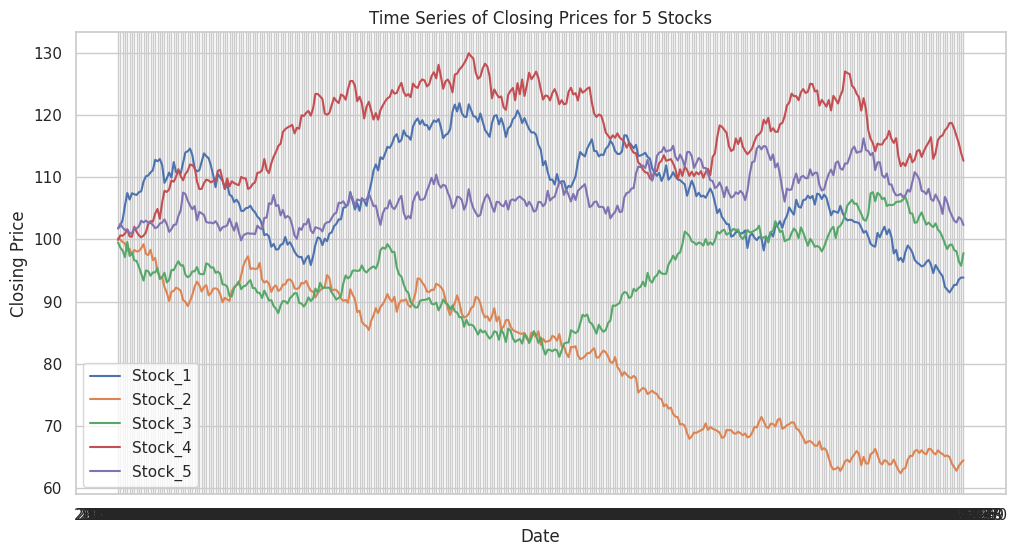

In [25]:
plt.figure(figsize = (12,6))
for column in df.columns:
    plt.plot(df.index, df[column], label = column)

plt.title('Time Series of Closing Prices for 5 Stocks')
plt.xlabel('Date')
plt.ylabel('Closing Price')
plt.legend()
plt.grid(True)
plt.show()

In [27]:
target_column = 'Stock_1' # Changed 'Close' to 'Stock_1'
features = df.drop(columns=[target_column])
X = features.select_dtypes(include=[np.number])
y = df[target_column]

In [28]:
scaler = StandardScaler()
X_scaled = scaler.fit_transform(X)

In [29]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y, test_size=0.2, random_state=42)

In [30]:
model = RandomForestRegressor(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

RandomForestRegressor(random_state=42)

In [31]:
y_pred = model.predict(X_test)
print("MSE:", mean_squared_error(y_test, y_pred))
print("R2 Score:", r2_score(y_test, y_pred))

MSE: 5.314247729238029
R2 Score: 0.8893264842017545


In [32]:
def predict_stock(**kwargs):
    input_df = pd.DataFrame([kwargs])
    input_scaled = scaler.transform(input_df)
    prediction = model.predict(input_scaled)
    return float(prediction[0])

Mean Squared Error: 5.314247729238029
Root Mean Squared Error: 2.3052652188496725
R-squared Score: 0.8893264842017545


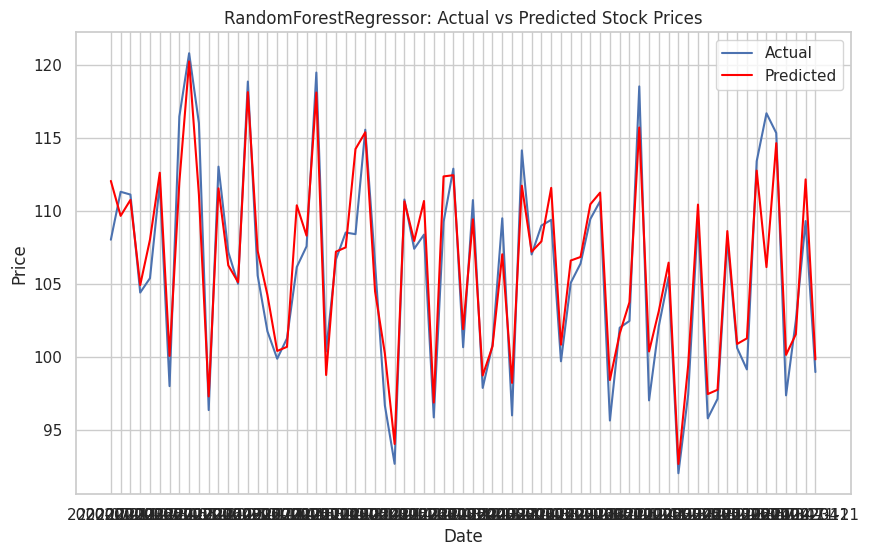

In [35]:
predictions = model.predict(X_test)

mse = mean_squared_error(y_test, predictions)
rmse = mse ** 0.5
r2 = r2_score(y_test, predictions)

print("Mean Squared Error:", mse)
print("Root Mean Squared Error:", rmse)
print("R-squared Score:", r2)

plt.figure(figsize=(10, 6))
plt.plot(y_test.index, y_test.values, label='Actual')
plt.plot(y_test.index, predictions, color='red', label='Predicted')
plt.title('RandomForestRegressor: Actual vs Predicted Stock Prices')
plt.xlabel('Date')
plt.ylabel('Price')
plt.legend()
plt.grid(True)
plt.show()

In [36]:
inputs = [gr.Number(label=col) for col in X.columns]
gr.Interface(fn=predict_stock, inputs=inputs, outputs="number", title="Stock Price Predictor").launch()

/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1028: UserWarning: Expected 0 arguments for function <function predict_stock at 0x7c696f7e9300>, received 4.
  warnings.warn(
/usr/local/lib/python3.11/dist-packages/gradio/utils.py:1036: UserWarning: Expected maximum 0 arguments for function <function predict_stock at 0x7c696f7e9300>, received 4.
  warnings.warn(


It looks like you are running Gradio on a hosted a Jupyter notebook. For the Gradio app to work, sharing must be enabled. Automatically setting `share=True` (you can turn this off by setting `share=False` in `launch()` explicitly).

Colab notebook detected. To show errors in colab notebook, set debug=True in launch()
* Running on public URL: https://398934a120c8da1821.gradio.live

This share link expires in 1 week. For free permanent hosting and GPU upgrades, run `gradio deploy` from the terminal in the working directory to deploy to Hugging Face Spaces (https://huggingface.co/spaces)
